In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
colors = ["windows blue", "amber"]
sns.set_palette(sns.xkcd_palette(colors))

ins = pd.read_csv('/data/MIMIC/by_insurance.csv')
print(ins.head())

  INSURANCE  STAYTIME
0   Private    333840
1  Medicare    931800
2   Private    670380
3   Private    200640
4  Medicare   1413900


In [2]:
medicare = ins[ins['INSURANCE'] == 'Medicare']['STAYTIME'].values
medicaid = ins[ins['INSURANCE'] == 'Medicaid']['STAYTIME'].values
private = ins[ins['INSURANCE'] == 'Private']['STAYTIME'].values
gov = ins[ins['INSURANCE'] == 'Government']['STAYTIME'].values
self = ins[ins['INSURANCE'] == 'Self Pay']['STAYTIME'].values

In [3]:
from scipy import stats
p_medicare_ttest = stats.ttest_ind(medicare, private, equal_var=False)
print(p_medicare_ttest)

p_medicaid_ttest = stats.ttest_ind(medicaid, private, equal_var=False)
print(p_medicaid_ttest)

p_gov_ttest = stats.ttest_ind(gov, private, equal_var=False)
print(p_gov_ttest)

P_self_ttest = stats.ttest_ind(self, private, equal_var=False)
print(P_self_ttest)
pvals=[p_medicare_ttest[1], p_medicaid_ttest[1], p_gov_ttest[1],
       P_self_ttest[1]]

Ttest_indResult(statistic=-2.6140021596623004, pvalue=0.0089522835326175179)
Ttest_indResult(statistic=5.5867471534808821, pvalue=2.3874210556501033e-08)
Ttest_indResult(statistic=-1.2634873164464901, pvalue=0.206550634847595)
Ttest_indResult(statistic=-11.170230989072657, pvalue=8.0373638206714102e-27)


[5.674652777777778, 7.142361111111111, 6.169444444444444, 5.51875, 4.002083333333333]
['Private' 'Medicare' 'Medicaid' 'Government' 'Self Pay']
Medicare      28215
Private       22582
Medicaid       5785
Government     1783
Self Pay        611
Name: INSURANCE, dtype: int64


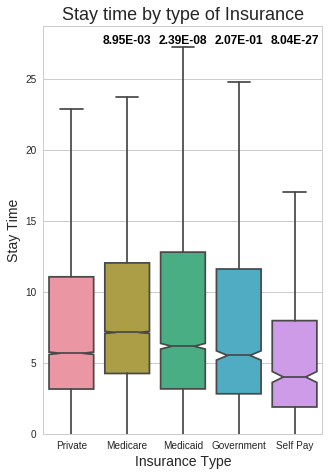

In [4]:
ins['STAYTIME'] = ins['STAYTIME'] / (60*60*24)
fig = plt.figure(figsize=(5,7.5))
g = sns.boxplot(data=ins, x='INSURANCE', y='STAYTIME', notch=True,
                showfliers=False, order=['Private', 'Medicare',
                                         'Medicaid', 'Government',
                                         'Self Pay'])
plt.title('Stay time by type of Insurance', fontsize=18)
plt.ylim(bottom=0)
plt.xlabel('Insurance Type', fontsize=14)
plt.ylabel('Stay Time', fontsize=14)

day_medians = [ins[ins['INSURANCE'] == 'Private']['STAYTIME'].median(),
               ins[ins['INSURANCE'] == 'Medicare']['STAYTIME'].median(),
               ins[ins['INSURANCE'] == 'Medicaid']['STAYTIME'].median(),
               ins[ins['INSURANCE'] == 'Government']['STAYTIME'].median(),
               ins[ins['INSURANCE'] == 'Self Pay']['STAYTIME'].median(),
               ]
print(day_medians)

pos = range(5)
for tick, label in zip(pos, g.get_xticklabels()):
    if tick > 0:
        g.text(pos[tick], 27.5, ("%.2E" % pvals[tick-1]),
               horizontalalignment='center', size='large',
               color='black', weight='semibold')

print(ins['INSURANCE'].unique())
print(ins['INSURANCE'].value_counts())

In [5]:
ins = pd.read_csv('/data/MIMIC/by_insurance_encounters.csv')
ins.rename(columns={'COUNT(E.ENCOUNTER_ID)':'ENCOUNTERS'}, inplace=True)
print(ins.head())

medicare = ins[ins['INSURANCE'] == 'Medicare']['ENCOUNTERS'].values
medicaid = ins[ins['INSURANCE'] == 'Medicaid']['ENCOUNTERS'].values
private = ins[ins['INSURANCE'] == 'Private']['ENCOUNTERS'].values
gov = ins[ins['INSURANCE'] == 'Government']['ENCOUNTERS'].values
self = ins[ins['INSURANCE'] == 'Self Pay']['ENCOUNTERS'].values

pvals = []
pvals.append(stats.ttest_ind(medicare, private))
pvals.append(stats.ttest_ind(medicaid, private))
pvals.append(stats.ttest_ind(gov, private))
pvals.append(stats.ttest_ind(self, private))
print(pvals)

   HADM_ID INSURANCE  ENCOUNTERS
0   100001   Private          34
1   100003   Private          18
2   100006   Private          28
3   100007   Private          22
4   100009   Private          15
[Ttest_indResult(statistic=-10.544703292402982, pvalue=5.7202238210663369e-26), Ttest_indResult(statistic=3.2243271307949524, pvalue=0.0012641399395439238), Ttest_indResult(statistic=-1.6301800998380114, pvalue=0.103076552912157), Ttest_indResult(statistic=-6.1032162657068012, pvalue=1.0562824891248821e-09)]


['Private' 'Medicaid' 'Medicare' 'Government' 'Self Pay']
Medicare      28103
Private       22250
Medicaid       5713
Government     1767
Self Pay        605
Name: INSURANCE, dtype: int64


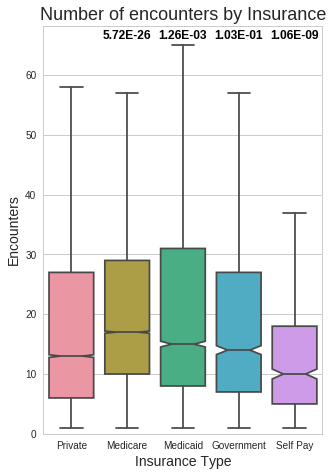

In [6]:
fig = plt.figure(figsize=(5,7.5))
g = sns.boxplot(data=ins, x='INSURANCE', y='ENCOUNTERS', notch=True,
                showfliers=False, order=['Private', 'Medicare',
                                         'Medicaid', 'Government',
                                         'Self Pay'])
plt.title('Number of encounters by Insurance', fontsize=18)
plt.ylim(bottom=0)
plt.xlabel('Insurance Type', fontsize=14)
plt.ylabel('Encounters', fontsize=14)

enc_medians = [ins[ins['INSURANCE'] == 'Private']['ENCOUNTERS'].median(),
               ins[ins['INSURANCE'] == 'Medicare']['ENCOUNTERS'].median(),
               ins[ins['INSURANCE'] == 'Medicaid']['ENCOUNTERS'].median(),
               ins[ins['INSURANCE'] == 'Government']['ENCOUNTERS'].median(),
               ins[ins['INSURANCE'] == 'Self Pay']['ENCOUNTERS'].median(),
               ]

pos = range(5)
for tick, label in zip(pos, g.get_xticklabels()):
    if tick > 0:
        g.text(pos[tick], 66, ("%.2E" % pvals[tick-1][1]),
               horizontalalignment='center', size='large',
               color='black', weight='semibold')

print(ins['INSURANCE'].unique())
print(ins['INSURANCE'].value_counts())

  INSURANCE  EncountersPerDay
0   Private            0.5000
1  Medicare            1.3636
2   Private            3.2857
3   Private            0.5000
4  Medicare            2.6875
[Ttest_indResult(statistic=14.919077609987237, pvalue=3.1721159118006535e-50), Ttest_indResult(statistic=8.7612031664186247, pvalue=2.0388462501491063e-18), Ttest_indResult(statistic=4.9225633889983973, pvalue=8.5983927713938507e-07), Ttest_indResult(statistic=-0.40676308590833393, pvalue=0.68418581046639027)]
[2.125, 2.4444, 2.4, 2.3846, 2.1333]
['Private' 'Medicare' 'Medicaid' 'Government' 'Self Pay']
Medicare      28103
Private       22250
Medicaid       5713
Government     1767
Self Pay        605
Name: INSURANCE, dtype: int64


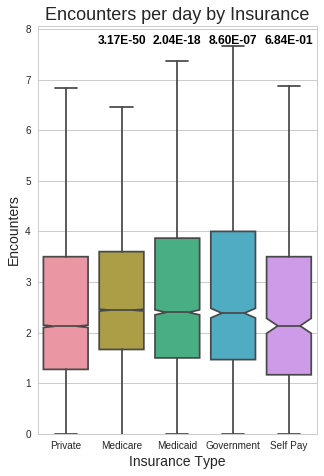

In [7]:
ins = pd.read_csv('/data/MIMIC/encounters_per_day_by_insurance.csv')
ins.fillna(0, inplace=True)
print(ins.head())

medicare = ins[ins['INSURANCE'] == 'Medicare']['EncountersPerDay'].values
medicaid = ins[ins['INSURANCE'] == 'Medicaid']['EncountersPerDay'].values
private = ins[ins['INSURANCE'] == 'Private']['EncountersPerDay'].values
gov = ins[ins['INSURANCE'] == 'Government']['EncountersPerDay'].values
self = ins[ins['INSURANCE'] == 'Self Pay']['EncountersPerDay'].values

pvals = []
pvals.append(stats.ttest_ind(medicare, private))
pvals.append(stats.ttest_ind(medicaid, private))
pvals.append(stats.ttest_ind(gov, private))
pvals.append(stats.ttest_ind(self, private))
print(pvals)

fig = plt.figure(figsize=(5,7.5))
g = sns.boxplot(data=ins, x='INSURANCE', y='EncountersPerDay', notch=True,
                showfliers=False, order=['Private', 'Medicare',
                                         'Medicaid', 'Government',
                                         'Self Pay'])
plt.title('Encounters per day by Insurance', fontsize=18)
plt.ylim(bottom=0)
plt.xlabel('Insurance Type', fontsize=14)
plt.ylabel('Encounters', fontsize=14)

enc_medians = [ins[ins['INSURANCE'] == 'Private']['EncountersPerDay'].median(),
               ins[ins['INSURANCE'] == 'Medicare']['EncountersPerDay'].median(),
               ins[ins['INSURANCE'] == 'Medicaid']['EncountersPerDay'].median(),
               ins[ins['INSURANCE'] == 'Government']['EncountersPerDay'].median(),
               ins[ins['INSURANCE'] == 'Self Pay']['EncountersPerDay'].median(),
               ]
print(enc_medians)

pos = range(5)
for tick, label in zip(pos, g.get_xticklabels()):
    if tick > 0:
        g.text(pos[tick], (7.7), ("%.2E" % pvals[tick-1][1]),
               horizontalalignment='center', size='large',
               color='black', weight='semibold')

print(ins['INSURANCE'].unique())
print(ins['INSURANCE'].value_counts())